In [4]:
#Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [5]:
data = pd.read_csv("C:\\Users\\DELL\\Desktop\\fraudTest.csv")
print(data)

        Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       frau

In [6]:
print(data.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [7]:
 #Dropping unnecessary columns (example: 'transactionID')
data = data.drop(['transactionID'], axis=1, errors='ignore')


In [8]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].mean(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_11940\1968046728.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [9]:
# Handling missing values for categorical columns
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_11940\445576952.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [10]:
# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [11]:
 
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [15]:
# Making predictions
y_pred = logreg.predict(X_test)

Logistic Regression Accuracy: 0.9958552268528515
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.00      0.00      0.00       640

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716



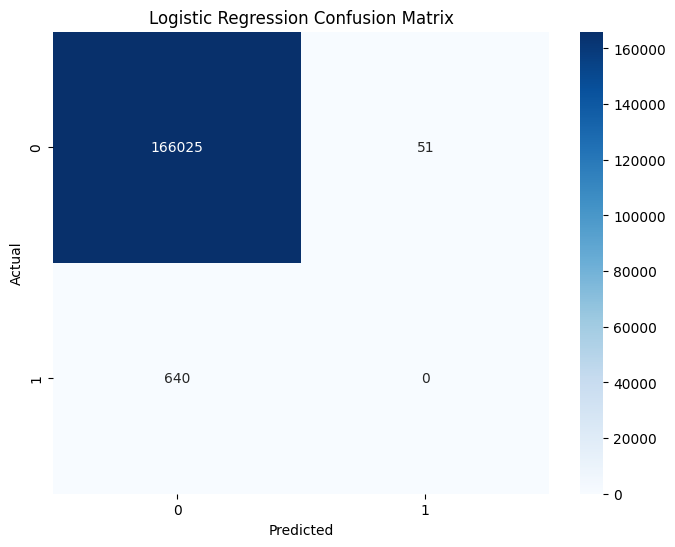

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Classification Report:\n{clf_report}")

# Visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Random Forest

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [19]:
# Training Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# Predicting and evaluating Random Forest model
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9983384918064253
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.96      0.59      0.73       640

    accuracy                           1.00    166716
   macro avg       0.98      0.80      0.87    166716
weighted avg       1.00      1.00      1.00    166716



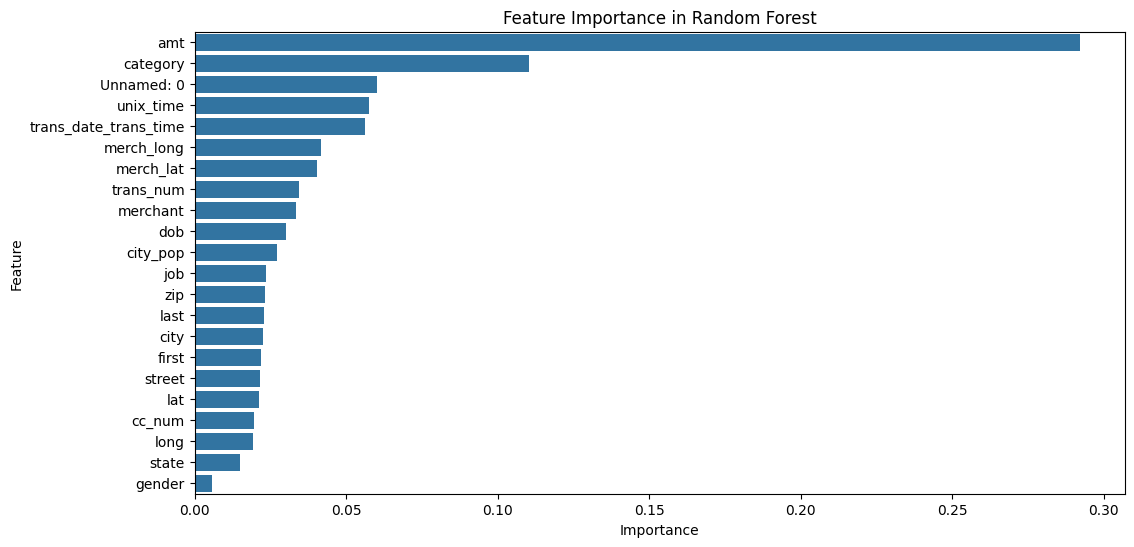

In [21]:
# Training Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Making predictions
y_pred = rf_clf.predict(X_test)
# Feature importance
feature_importances = rf_clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

# svm

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [23]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [24]:
 #Splitting the data into features and target
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

In [25]:
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9968029463278869
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.81      0.22      0.34       640

    accuracy                           1.00    166716
   macro avg       0.90      0.61      0.67    166716
weighted avg       1.00      1.00      1.00    166716



In [26]:
from sklearn.decomposition import PCA

# Reduce the dimensionality to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)


In [34]:
# Train the SVM model on the reduced 2D data
svm_clf_2D = SVC(kernel='rbf')
svm_clf_2D.fit(X_train_2D, y_train)


SVC()

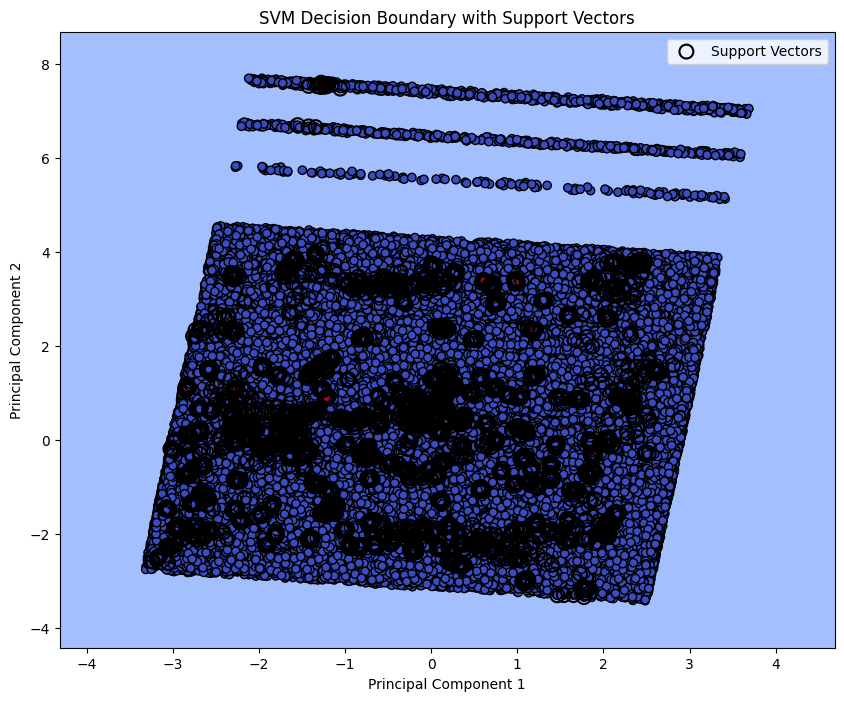

In [35]:
import numpy as np
def plot_svm_decision_boundary(svm, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')
    plt.title('SVM Decision Boundary with Support Vectors')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Plotting the decision boundary
plot_svm_decision_boundary(svm_clf_2D, X_train_2D, y_train)







# K-Nearest Neighbors (KNN)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [37]:
# Training KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.997036877084383
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.72      0.37      0.49       640

    accuracy                           1.00    166716
   macro avg       0.86      0.68      0.74    166716
weighted avg       1.00      1.00      1.00    166716

